<a href="https://colab.research.google.com/github/Bisalia/Bayesian_network/blob/main/MNIST_number_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## н гуесан би Армель
## задача №1
## группа М08-

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

from torchvision.datasets import MNIST
import torch.optim as optim
import copy
import matplotlib.pyplot as plt


In [2]:
batch_size =64

##Getting Data


In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])
mnist_trainset =MNIST(root='data',  train=True, download=True, transform=transform)
mnist_val = MNIST(root='data', train=False, download=True, transform=transform)
train_dl = torch.utils.data.DataLoader(mnist_trainset, batch_size = batch_size)
val_dl = torch.utils.data.DataLoader(mnist_val, batch_size = batch_size)

100%|██████████| 9912422/9912422 [00:00<00:00, 149510431.37it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 42683472.10it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 36268670.30it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 18406307.99it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
image, label = mnist_trainset[0]
image.shape

torch.Size([1, 28, 28])

In [5]:
# See classes
class_names = mnist_trainset.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

Image shape: torch.Size([1, 28, 28])


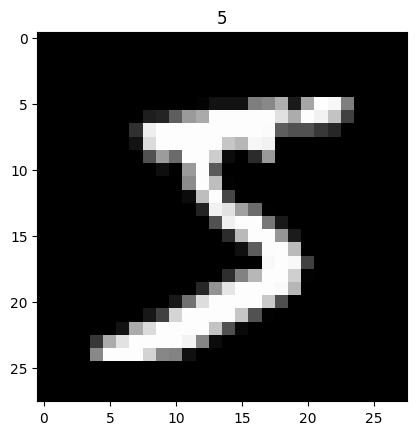

In [6]:
import matplotlib.pyplot as plt
image, label = mnist_trainset[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap='gray') # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

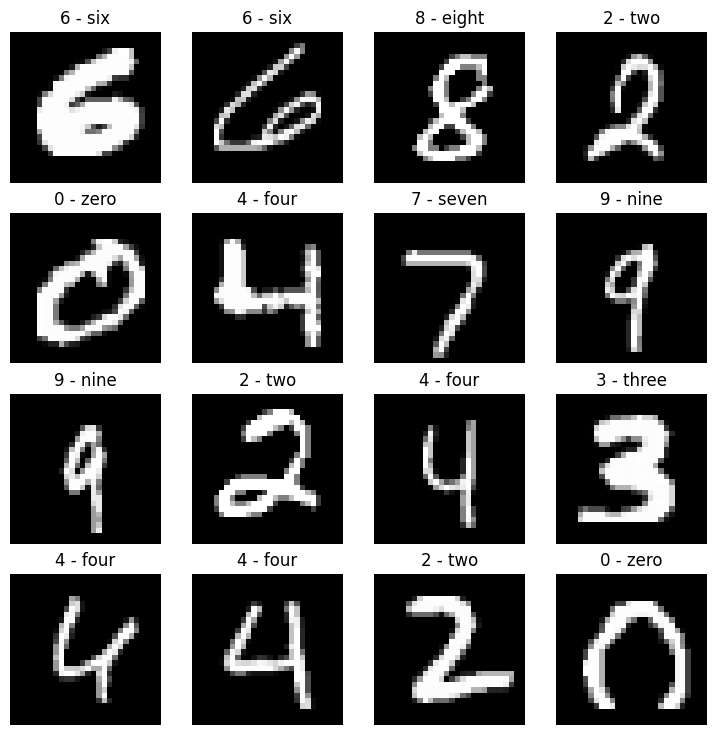

In [7]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(mnist_trainset), size=[1]).item()
    img, label = mnist_trainset[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

##Creating the Model
##For the Mnist dataset, we will be using the LeNet 5 architecture


In [32]:


class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.relu1 = nn.ReLU()
        self.avgpool1 = nn.AvgPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, 5, padding=0)
        self.relu2 = nn.ReLU()
        self.avgpool2 = nn.AvgPool2d(2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(400, 120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.avgpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.avgpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        x = self.relu4(x)
        x = self.fc3(x)
        return x

# Create an instance of the LeNet model
lenet_model = LeNet()



##Validating the Model

In [9]:
def validate(model, data, device='cpu'):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x,1)
        pred = pred.data.cpu()
        total += x.size(0)
        correct += torch.sum(pred == labels)
    return correct*100./total


##Training Function


In [11]:

def train(model, numb_epoch=10, lr=1e-3, device='cpu'):
    accuracies = []
    cnn = LeNet().to(device)
    cec = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr=lr)
    max_accuracy = 0
    for epoch in range(numb_epoch):
        for i, (images, labels) in enumerate(train_dl):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred, labels)
            loss.backward()
            optimizer.step()
        accuracy = float(validate(cnn, val_dl))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(cnn)
            max_accuracy = accuracy
            print("Saving Best Model with Accuracy: ", accuracy)
        print('Epoch:', epoch+1, "Accuracy :", accuracy, '%')
    plt.plot(accuracies)
    return best_model

##GPU Availability


In [12]:

if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
    print("No Cuda Available")
device

device(type='cuda', index=0)

Saving Best Model with Accuracy:  96.56999969482422
Epoch: 1 Accuracy : 96.56999969482422 %
Saving Best Model with Accuracy:  97.51000213623047
Epoch: 2 Accuracy : 97.51000213623047 %
Saving Best Model with Accuracy:  97.69999694824219
Epoch: 3 Accuracy : 97.69999694824219 %
Saving Best Model with Accuracy:  98.30999755859375
Epoch: 4 Accuracy : 98.30999755859375 %
Epoch: 5 Accuracy : 98.18000030517578 %
Saving Best Model with Accuracy:  98.55999755859375
Epoch: 6 Accuracy : 98.55999755859375 %
Saving Best Model with Accuracy:  98.72000122070312
Epoch: 7 Accuracy : 98.72000122070312 %
Saving Best Model with Accuracy:  98.79000091552734
Epoch: 8 Accuracy : 98.79000091552734 %
Saving Best Model with Accuracy:  98.80999755859375
Epoch: 9 Accuracy : 98.80999755859375 %
Saving Best Model with Accuracy:  98.81999969482422
Epoch: 10 Accuracy : 98.81999969482422 %


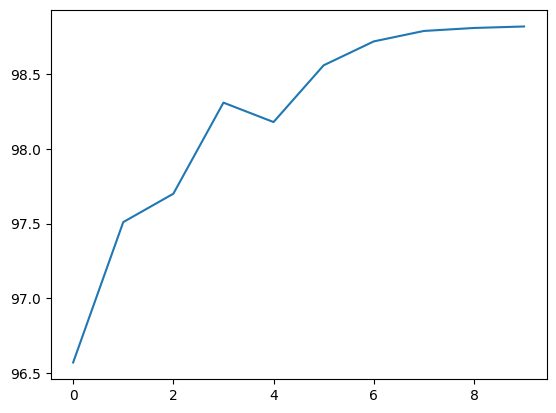

In [13]:
lenet = train(40, device=device)

##Iterative augmentation





In [61]:
'''
# Modify the validate function to accept the device
def validate(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total * 100
    return accuracy'''

# Modifier la fonction train_iterative_augmentation pour passer l'appareil à valider
def train_iterative_augmentation(model, num_epochs=3, learning_rate=1e-3, device="cpu", save_path="best_model.pth"):
    accuracies = []
    cnn = LeNet().to(device)
    cec = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr=learning_rate)

    # learning rate scheduler
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    max_accuracy = 0

    # Augmentation transforms
    augmentations = [
        transforms.RandomRotation(45),
        transforms.RandomResizedCrop(28, scale=(8.0, 1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]

    for epoch in range(num_epochs):
       # Apply different augmentations in each epoch
        random_augmentation = transforms.RandomChoice(augmentations)
        transform = transforms.Compose([random_augmentation, transforms.ToTensor()])

        # Apply transformations to the dataset
        augmented_trainset = mnist_trainset
        # Create a new DataLoader with the augmented dataset
        augmented_train_dl = DataLoader(augmented_trainset, batch_size=batch_size, shuffle=True, num_workers=4)

        for i, (images, labels) in enumerate(augmented_train_dl):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred, labels)
            loss.backward()
            optimizer.step()

       # Show some images after augmentation for the first batch of the first epoch
        if epoch == 0:
            for images, _ in augmented_train_dl:
                original_image = torchvision.transforms.ToPILImage()(images[0].cpu())
                plt.subplot(1, 2, 1)
                plt.imshow(original_image)
                plt.title('Image original')
                plt.axis('off')

                augmented_image = torchvision.transforms.ToPILImage()(images[0].cpu())
                plt.subplot(1, 2, 2)
                plt.imshow(augmented_image)
                plt.title('Image augmented')
                plt.axis('off')
                plt.show()
                break
# Passing the model, validation data and device to the validation function
        accuracy = float(validate(cnn, val_dl, device))  # Assuming val_dl is your validation dataloader
        accuracies.append(accuracy)

        if accuracy > max_accuracy:
            # Sauvegarder le meilleur modèle
            torch.save(cnn.state_dict(), save_path)
            max_accuracy = accuracy
            print("Saving Best Model with Accuracy:urracy", accuracy)

        print('Époque:', epoch + 1, "Précision:", accuracy, '%')

# Update learning rate with planner        scheduler.step()

    plt.plot(accuracies)
    plt.xlabel("Époch")
    plt.ylabel("Acc of validation")
    plt.show()

    return cnn

# Call the function and capture the returned model
best_model_iterative_augmentation = train_iterative_augmentation(lenet_model, num_epochs=10, learning_rate=1e-3, device=device, save_path="best_model.pth")







## Iterative defrosting of layers

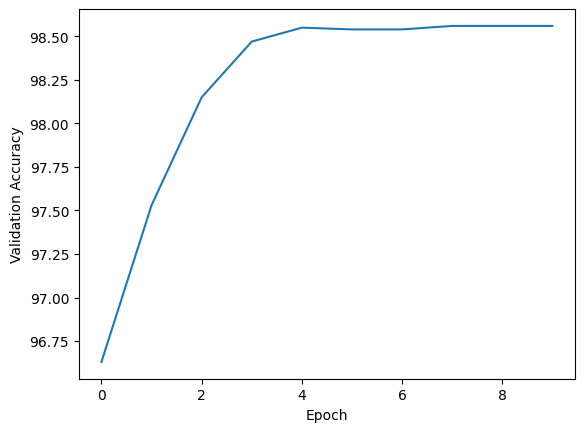

In [65]:

def train_defrosting(model, train_loader, val_loader, num_epochs=5, learning_rate=1e-3, device="cpu"):
    accuracies = []
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")

        # Gradually unfreeze layers
        unfreeze_layers = min(4, epoch)  # You can adjust the number of layers to unfreeze at each step
        for param in model.parameters():
            param.requires_grad = True
        for i, (name, param) in enumerate(model.named_parameters()):
            if i >= len(list(model.named_parameters())) - unfreeze_layers * 2:
                param.requires_grad = False

        model.train()

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        accuracy = validate(model, val_loader, device)
        accuracies.append(accuracy)
        print(f"Validation Accuracy: {accuracy:.2f}%")

    return model, accuracies

# Create an instance of the LeNet model
#lenet_model = LeNet().to(device)

# Train with iterative defrosting
#trained_model, accuracies = train_defrosting(lenet_model, train_dl, val_dl, num_epochs=10, learning_rate=1e-3, device=device)

# Plotting accuracies
plt.plot(accuracies)
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.show()

Saving Best Model with Accuracy:  96.25
Epoch: 1 Accuracy : 96.25 %
Saving Best Model with Accuracy:  97.7699966430664
Epoch: 2 Accuracy : 97.7699966430664 %
Saving Best Model with Accuracy:  98.27999877929688
Epoch: 3 Accuracy : 98.27999877929688 %
Saving Best Model with Accuracy:  98.37999725341797
Epoch: 4 Accuracy : 98.37999725341797 %
Saving Best Model with Accuracy:  98.68000030517578
Epoch: 5 Accuracy : 98.68000030517578 %
Saving Best Model with Accuracy:  98.87999725341797
Epoch: 6 Accuracy : 98.87999725341797 %
Epoch: 7 Accuracy : 98.87000274658203 %
Epoch: 8 Accuracy : 98.87999725341797 %
Epoch: 9 Accuracy : 98.87000274658203 %
Saving Best Model with Accuracy:  98.88999938964844
Epoch: 10 Accuracy : 98.88999938964844 %
Epoch 1/10
Validation Accuracy: 96.75%
Epoch 2/10
Validation Accuracy: 98.04%
Epoch 3/10
Validation Accuracy: 98.10%
Epoch 4/10
Validation Accuracy: 98.52%
Epoch 5/10
Validation Accuracy: 98.66%
Epoch 6/10
Validation Accuracy: 98.69%
Epoch 7/10
Validation Accur

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:917: UserWarning: Scale and ratio should be of kind (min, max)
  warnings.warn("Scale and ratio should be of kind (min, max)")
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-61-1f7d073591ef>:66: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


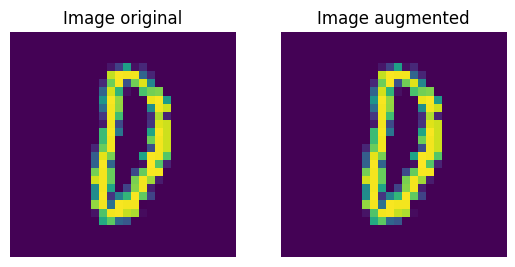

Saving Best Model with Accuracy:urracy 96.2300033569336
Époque: 1 Précision: 96.2300033569336 %
Saving Best Model with Accuracy:urracy 97.44000244140625
Époque: 2 Précision: 97.44000244140625 %
Saving Best Model with Accuracy:urracy 97.8499984741211
Époque: 3 Précision: 97.8499984741211 %
Saving Best Model with Accuracy:urracy 98.66000366210938
Époque: 4 Précision: 98.66000366210938 %
Époque: 5 Précision: 98.18000030517578 %
Saving Best Model with Accuracy:urracy 98.93000030517578
Époque: 6 Précision: 98.93000030517578 %
Saving Best Model with Accuracy:urracy 99.0
Époque: 7 Précision: 99.0 %
Saving Best Model with Accuracy:urracy 99.05000305175781
Époque: 8 Précision: 99.05000305175781 %
Époque: 9 Précision: 99.05000305175781 %
Époque: 10 Précision: 98.87999725341797 %


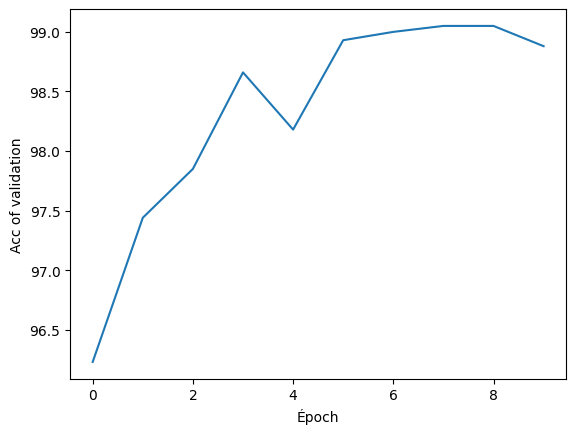

In [68]:
# Use the LeNet model
lenet_model = LeNet().to(device)
# Train the pure model with 10 epochs
pure_classifier = train(lenet_model, numb_epoch=10, lr=1e-3, device=device)

# Train the model with iterative defrost and adaptive lr with 10 epochs

trained_model_iterative_defrosting = train_defrosting(lenet_model, train_dl, val_dl, num_epochs=10, learning_rate=1e-3, device=device

best_model_iterative_augmentation = train_iterative_augmentation(lenet_model, num_epochs=10, learning_rate=1e-3, device=device, save_path="best_model.pth")

